In [1]:
from streprogen import (
    Program,
    reps_to_intensity,
    progression_diffeq,
    progression_sawtooth,
    progression_sinusoidal,
)
import matplotlib.pyplot as plt
import functools
import numpy as np

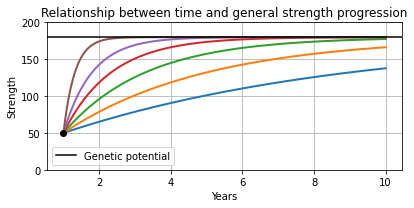

In [2]:
plt.figure(figsize=(6, 3))
plt.title("Relationship between time and general strength progression")

duration = 10
weeks = np.linspace(1, duration, num=1000)

for k in [1, 2, 3.5, 6, 10, 25]:
    k = k / 8
    progression = (50 - 180) * np.exp(k * (1 - weeks)) + 180

    if k != 1:
        plt.plot(weeks, progression, "-", 
                 #color="black", 
                 lw=2)
    else:
        plt.plot(
            weeks, progression, "-", 
            #color="black",
            lw=2, label="Strength progression"
        )


plt.axhline(y=180, label="Genetic potential", color="k")

plt.scatter([1], [50], zorder=50, color="k")
plt.xlabel("Years")
plt.ylabel("Strength")
plt.grid()
plt.ylim([0, 200])
plt.legend()
plt.tight_layout()
plt.savefig("strength_progression_longterm.pdf")

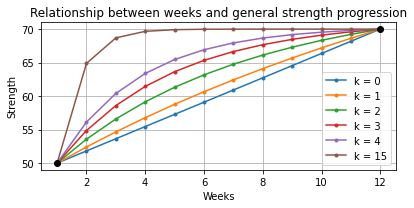

In [3]:
plt.figure(figsize=(6, 3))
plt.title("Relationship between weeks and general strength progression")

duration = 12
weeks = np.arange(1, duration+1)

for k in [0, 1, 2, 3, 4, 15]:
    progression = functools.partial(progression_diffeq, k=k)
    plt.plot(
        weeks,
        progression(
            weeks, start_weight=50, final_weight=70, start_week=1, final_week=12
        ),
        "-o",
        label="k = " + str(k), markersize=3
    )

plt.scatter([1, 12], [50, 70], zorder=50, color="k")
plt.xlabel("Weeks")
plt.ylabel("Strength")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("strength_progression_program_specific.pdf")

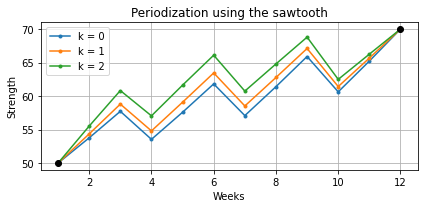

In [4]:
plt.figure(figsize=(6, 3))
plt.title("Periodization using the sawtooth")

duration = 12
weeks = np.arange(1, duration + 1)

for k in [0, 1, 2]:
    plt.plot(
        weeks,
        progression_sawtooth(
            weeks, start_weight=50, final_weight=70, start_week=1, final_week=duration,
            period=3, scale=0.05, correct_boundaries=True, k=k
            
        ),
        "-o",
        label="k = " + str(k), markersize=3
    )

plt.scatter([1, duration], [50, 70], zorder=50, color="k")
plt.xlabel("Weeks")
plt.ylabel("Strength")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("strength_progression_program_sawtooth_varying_nonlinearity.pdf")

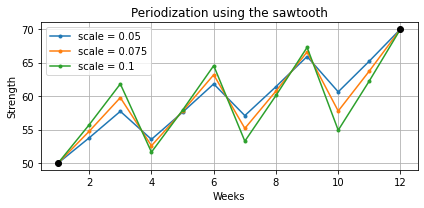

In [5]:
plt.figure(figsize=(6, 3))
plt.title("Periodization using the sawtooth")

duration = 12
weeks = np.arange(1, duration + 1)

for scale in [0.05, 0.075, 0.1]:
    plt.plot(
        weeks,
        progression_sawtooth(
            weeks, start_weight=50, final_weight=70, start_week=1, final_week=duration,
            period=3, scale=scale, correct_boundaries=True, k=0
            
        ),
        "-o",
        label="scale = " + str(scale), markersize=3
    )

plt.scatter([1, duration], [50, 70], zorder=50, color="k")
plt.xlabel("Weeks")
plt.ylabel("Strength")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("strength_progression_program_sawtooth_varying_scale.pdf")

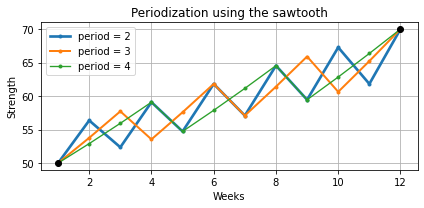

In [6]:
plt.figure(figsize=(6, 3))
plt.title("Periodization using the sawtooth")

duration = 12
weeks = np.arange(1, duration + 1)

for period in [2, 3, 4]:
    plt.plot(
        weeks,
        progression_sawtooth(
            weeks, start_weight=50, final_weight=70, start_week=1, final_week=duration,
            period=period, scale=0.05, correct_boundaries=True, k=0
            
        ),
        "-o",
        label="period = " + str(period), zorder=period*10, lw = 4 - period/1.5, markersize=3
    )

plt.scatter([1, duration], [50, 70], zorder=50, color="k")
plt.xlabel("Weeks")
plt.ylabel("Strength")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("strength_progression_program_sawtooth_varying_period.pdf")

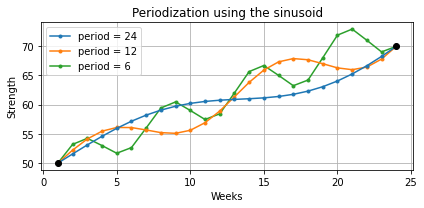

In [7]:
plt.figure(figsize=(6, 3))
plt.title("Periodization using the sinusoid")

duration = 24
weeks = np.arange(1, duration + 1)

for period in [24, 12, 6]:
    plt.plot(
        weeks,
        progression_sinusoidal(
            weeks, start_weight=50, final_weight=70, start_week=1, final_week=duration,
            period=period, scale=0.05, correct_boundaries=True, k=0
            
        ),
        "-o",
        label="period = " + str(period), zorder=period, markersize=3
    )

plt.scatter([1, duration], [50, 70], zorder=50, color="k")
plt.xlabel("Weeks")
plt.ylabel("Strength")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("strength_progression_program_sinusoidal_varying_period.pdf")

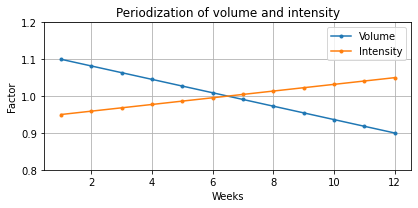

In [8]:
plt.figure(figsize=(6, 3))
plt.title("Periodization of volume and intensity")

duration = 12
weeks = np.arange(1, duration + 1)


plt.plot(
    weeks,
    progression_sinusoidal(
        weeks, start_weight=1.1, final_weight=0.9, start_week=1, final_week=duration,
        period=4, scale=0.0, correct_boundaries=False, k=0

    ),
    "-o",
    label="Volume", zorder=10, markersize=3
)

plt.plot(
    weeks,
    progression_sinusoidal(
        weeks, start_weight=0.95, final_weight=1.05, start_week=1, final_week=duration,
        period=4, scale=0.0, correct_boundaries=False, k=0, offset=2

    ),
    "-o",
    label="Intensity", zorder=10,markersize=3
)


plt.xlabel("Weeks")
plt.ylabel("Factor")
plt.ylim([0.8, 1.2])
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("periodization_reps_intensity.pdf")

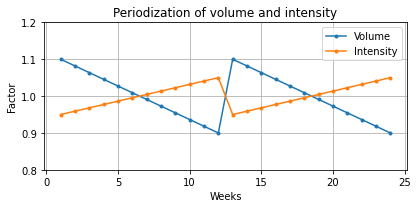

In [9]:
plt.figure(figsize=(6, 3))
plt.title("Periodization of volume and intensity")

duration = 24
weeks = np.arange(1, duration + 1)


plt.plot(
    weeks,
    2.0 - np.array(progression_sawtooth(
        weeks, start_weight=1.0, final_weight=1.0, start_week=1, final_week=duration,
        period=12, scale=0.1, correct_boundaries=False, k=0

    )),
    "-o",
    label="Volume", zorder=10, markersize=3
)



plt.plot(
    weeks,
    progression_sawtooth(
        weeks, start_weight=1, final_weight=1, start_week=1, final_week=duration,
        period=12, scale=0.05, correct_boundaries=False, k=0, offset=0

    ),
    "-o",
    label="Intensity", zorder=10, markersize=3
)


plt.xlabel("Weeks")
plt.ylabel("Factor")
plt.ylim([0.8, 1.2])
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("periodization_reps_intensity_double.pdf")

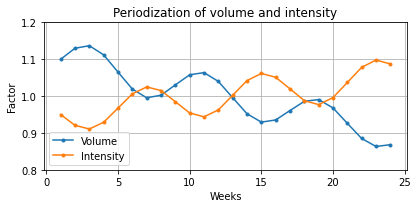

In [10]:
plt.figure(figsize=(6, 3))
plt.title("Periodization of volume and intensity")

duration = 24
weeks = np.arange(1, duration + 1)


period = 8

plt.plot(
    weeks,
    progression_sinusoidal(
        weeks, start_weight=1.1, final_weight=0.9, start_week=1, final_week=duration,
        period=period, scale=0.05, correct_boundaries=False, k=0

    ),
    "-o",
    label="Volume", zorder=10, markersize=3
)

plt.plot(
    weeks,
    progression_sinusoidal(
        weeks, start_weight=0.95, final_weight=1.05, start_week=1, final_week=duration,
        period=period, scale=0.05, correct_boundaries=False, k=0, offset=period//2

    ),
    "-o",
    label="Intensity", zorder=10, markersize=3
)


plt.xlabel("Weeks")
plt.ylabel("Factor")
plt.ylim([0.8, 1.2])
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("periodization_reps_intensity_out_of_phase.pdf")

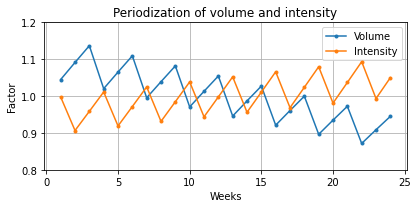

In [11]:
plt.figure(figsize=(6, 3))
plt.title("Periodization of volume and intensity")

duration = 24
weeks = np.arange(1, duration + 1)


period = 3

plt.plot(
    weeks,
    progression_sawtooth(
        weeks, start_weight=1.1, final_weight=0.9, start_week=1, final_week=duration,
        period=period, scale=0.05, correct_boundaries=False, k=0

    ),
    "-o",
    label="Volume", zorder=10, markersize=3
)

plt.plot(
    weeks,
    progression_sawtooth(
        weeks, start_weight=0.95, final_weight=1.05, start_week=1, final_week=duration,
        period=period, scale=0.05, correct_boundaries=False, k=0, offset=period//2

    ),
    "-o",
    label="Intensity", zorder=10, markersize=3
)


plt.xlabel("Weeks")
plt.ylabel("Factor")
plt.ylim([0.8, 1.2])
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("periodization_reps_intensity_out_of_phase.pdf")

# Sets and repetitions

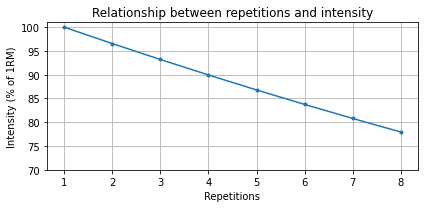

In [12]:
from streprogen import reps_to_intensity, reps_to_intensity_relaxed, reps_to_intensity_tight

plt.figure(figsize=(6, 3))
plt.title("Relationship between repetitions and intensity")

reps = np.arange(1, 8 + 1)

plt.plot(
    reps,
    [reps_to_intensity(r, constant=100, quadratic=True) for r in reps],
    "-o", zorder=10, markersize=3
)

plt.xlabel("Repetitions")
plt.ylabel("Intensity (% of 1RM)")
plt.ylim([70, 101])
plt.xticks(reps, reps)
plt.grid()

plt.tight_layout()
plt.savefig("reps_intensity_mapping.pdf")

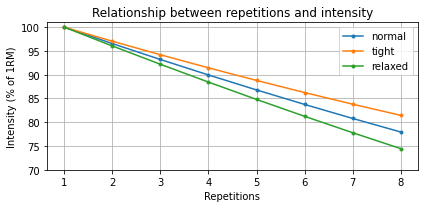

In [54]:
from streprogen import reps_to_intensity, reps_to_intensity_relaxed, reps_to_intensity_tight

plt.figure(figsize=(6, 3))
plt.title("Relationship between repetitions and intensity")

reps = np.arange(1, 8 + 1)


for slope, name in zip([-3.5, -3, -4],
                        ["normal", "tight", "relaxed"]):
    plt.plot(
        reps,
        [reps_to_intensity(r, slope=slope, constant=100, quadratic=True) for r in reps],
        "-o",
        label=name, zorder=10, markersize=3
    )

plt.xlabel("Repetitions")
plt.ylabel("Intensity (% of 1RM)")
plt.ylim([70, 101])
plt.xticks(reps, reps)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("reps_intensity_mapping_many.pdf")

In [55]:
from streprogen import RepSchemeGenerator, RepSchemeOptimizer

In [56]:
generator = RepSchemeGenerator(reps_slack = 0,
    max_diff = 99,
    max_unique = 99,)

for t in list(tuple(reversed(t)) for t in generator.generate(sets=[2, 3, 4, 5], reps_goal = 12)):
    print(t, r"\\")

(2, 2, 2, 2, 2, 2) \\
(4, 2, 2, 2, 2) \\
(3, 3, 2, 2, 2) \\
(5, 3, 2, 2) \\
(4, 4, 2, 2) \\
(4, 3, 3, 2) \\
(5, 5, 2) \\
(3, 3, 3, 3) \\
(5, 4, 3) \\
(4, 4, 4) \\


In [57]:
def avg_intensity(scheme):
    ints = (reps_to_intensity(r, constant=100, quadratic=True)*r for r in scheme)
    return sum(ints) / sum(scheme)

In [59]:
sets=[3, 4, 5, 6, 7, 8]

generator = RepSchemeGenerator(reps_slack = 0,
    max_diff = 99,
    max_unique = 99,)

print(len(list(generator.generate(sets=sets, reps_goal = 25))))

for t in list(tuple(reversed(t)) for t in generator.generate(sets=sets, reps_goal = 25)):
    print(t, f"[{round(avg_intensity(t), 1)}]", r"\\")

45
(4, 3, 3, 3, 3, 3, 3, 3) [92.7] \\
(7, 3, 3, 3, 3, 3, 3) [89.7] \\
(6, 4, 3, 3, 3, 3, 3) [90.4] \\
(5, 5, 3, 3, 3, 3, 3) [90.6] \\
(5, 4, 4, 3, 3, 3, 3) [90.9] \\
(8, 5, 3, 3, 3, 3) [87.0] \\
(7, 6, 3, 3, 3, 3) [87.5] \\
(4, 4, 4, 4, 3, 3, 3) [91.1] \\
(8, 4, 4, 3, 3, 3) [87.3] \\
(7, 5, 4, 3, 3, 3) [87.9] \\
(6, 6, 4, 3, 3, 3) [88.1] \\
(6, 5, 5, 3, 3, 3) [88.4] \\
(8, 8, 3, 3, 3) [83.4] \\
(7, 4, 4, 4, 3, 3) [88.2] \\
(6, 5, 4, 4, 3, 3) [88.6] \\
(5, 5, 5, 4, 3, 3) [88.8] \\
(8, 7, 4, 3, 3) [84.3] \\
(8, 6, 5, 3, 3) [84.8] \\
(7, 7, 5, 3, 3) [85.0] \\
(7, 6, 6, 3, 3) [85.2] \\
(6, 4, 4, 4, 4, 3) [88.9] \\
(5, 5, 4, 4, 4, 3) [89.1] \\
(8, 6, 4, 4, 3) [85.0] \\
(7, 7, 4, 4, 3) [85.2] \\
(8, 5, 5, 4, 3) [85.2] \\
(7, 6, 5, 4, 3) [85.7] \\
(6, 6, 6, 4, 3) [85.9] \\
(7, 5, 5, 5, 3) [85.9] \\
(6, 6, 5, 5, 3) [86.1] \\
(8, 8, 6, 3) [81.2] \\
(8, 7, 7, 3) [81.4] \\
(5, 4, 4, 4, 4, 4) [89.3] \\
(8, 5, 4, 4, 4) [85.5] \\
(7, 6, 4, 4, 4) [85.9] \\
(7, 5, 5, 4, 4) [86.1] \\
(6, 6, 5, 4, 4) [8

In [16]:
len(list(tuple(reversed(t)) for t in generator.generate(sets=list(range(1, 9)), reps_goal=25)))

1090

In [17]:
optimizer = RepSchemeOptimizer(generator=generator)

optimizer(sets= tuple([2, 3, 4]),
    intensities= tuple([95, 90, 85]),
    reps_goal= 12,
    intensity_goal= 88)

[4, 4, 2, 2]

In [32]:
import os

for file in os.listdir("."):
    if not file.endswith(".pdf"):
        continue
        
    if "presentation" in file:
        continue
        
    print(r"""
\begin{frame}[fragile, t]{TITLE}
	\vfill
	TODO
	\vfill
	\begin{figure}
		\centering
		\includegraphics[width=\linewidth]{""" + file + r"""}
	\end{figure}
	\vfill
\end{frame}
""")


\begin{frame}[fragile, t]{TITLE}
	\vfill
	TODO
	\vfill
	\begin{figure}
		\centering
		\includegraphics[width=\linewidth]{strength_progression_program_sawtooth_varying_period.pdf}
	\end{figure}
	\vfill
\end{frame}


\begin{frame}[fragile, t]{TITLE}
	\vfill
	TODO
	\vfill
	\begin{figure}
		\centering
		\includegraphics[width=\linewidth]{strength_progression_program_sawtooth_varying_nonlinearity.pdf}
	\end{figure}
	\vfill
\end{frame}


\begin{frame}[fragile, t]{TITLE}
	\vfill
	TODO
	\vfill
	\begin{figure}
		\centering
		\includegraphics[width=\linewidth]{strength_progression_program_specific.pdf}
	\end{figure}
	\vfill
\end{frame}


\begin{frame}[fragile, t]{TITLE}
	\vfill
	TODO
	\vfill
	\begin{figure}
		\centering
		\includegraphics[width=\linewidth]{strength_progression_program_sinusoidal_varying_period.pdf}
	\end{figure}
	\vfill
\end{frame}


\begin{frame}[fragile, t]{TITLE}
	\vfill
	TODO
	\vfill
	\begin{figure}
		\centering
		\includegraphics[width=\linewidth]{periodization_reps_intens